In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_excel("C:/Users/azhar/OneDrive/Desktop/Python/Restaurant Data/data.xlsx")

In [3]:
countrycode = pd.read_excel("C:/Users/azhar/OneDrive/Desktop/Python/Restaurant Data/Country-Code.xlsx")

In [4]:
restaurant_df = data.merge(countrycode, on='Country Code', how='inner')

In [5]:
restaurant_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [6]:
restaurant_df.shape

(9551, 20)

In [7]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
new_restaurant = restaurant_df.dropna(axis=0)

In [9]:
new_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9541 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating      9541

In [10]:
new_restaurant.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.541000e+03,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000
mean,9.044236e+06,18.181008,64.274135,25.848826,1200.368096,1.804842,2.665088,156.707892
std,8.791953e+06,56.454284,41.199675,11.010633,16129.588655,0.905528,1.516596,430.180201
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019320e+05,1.000000,77.081601,28.478683,250.000000,1.000000,2.500000,5.000000
50%,6.003426e+06,1.000000,77.192035,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835266e+07,1.000000,77.282045,28.642713,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
new_restaurant.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
new_restaurant.drop(['Restaurant ID', 'Longitude', 'Latitude', 'Address', 'Locality', 'Locality Verbose'], axis=1)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Skye,94,Jakarta,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,Satoo - Hotel Shangri-La,94,Jakarta,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,Sushi Masa,94,Jakarta,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,3 Wise Monkeys,94,Jakarta,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,Avec Moi Restaurant and Bar,94,Jakarta,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Senor Iguanas,216,Pocatello,Mexican,0,Dollar($),No,No,1,3.6,Yellow,Good,108,United States
9547,Lake House Restaurant,37,Vineland Station,"Italian, Mediterranean, Pizza",70,Dollar($),No,No,4,4.3,Green,Very Good,204,Canada
9548,Tokyo Sushi,37,Chatham-Kent,"Japanese, Sushi",25,Dollar($),No,No,2,3.7,Yellow,Good,176,Canada
9549,Consort Restaurant,37,Consort,"Chinese, Canadian",25,Dollar($),No,No,2,3.0,Orange,Average,6,Canada


In [13]:
new_restaurant['City'].value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Paynesville          1
Randburg             1
Princeton            1
Yorkton              1
Name: count, Length: 140, dtype: int64

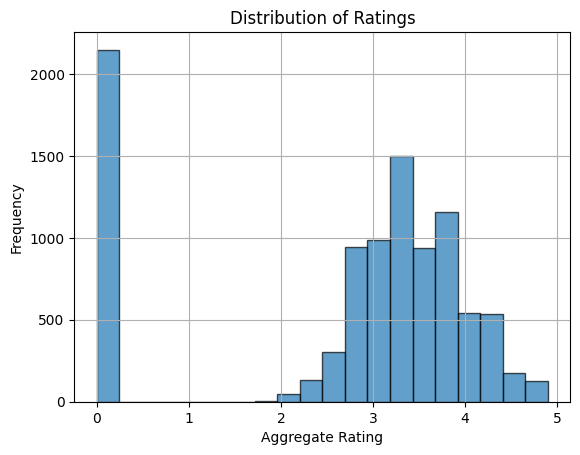

In [14]:
plt.hist(new_restaurant['Aggregate rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
new_restaurant['Country'].value_counts()

Country
India             8651
United States      425
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: count, dtype: int64

In [16]:
new_restaurant['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day           83
Domino's Pizza            79
Subway                    63
Green Chick Chop          51
McDonald's                48
                          ..
Standard Chicken Point     1
Punjabi Restaurant         1
Knight Rock                1
Jalapenos                  1
Arigato Sushi              1
Name: count, Length: 7436, dtype: int64

In [17]:
# Group the data by 'Restaurant Name' and count unique countries
restaurant_country_counts = new_restaurant.groupby('Restaurant Name')['Country'].nunique()

# Find the restaurant name with the most number of unique countries
restaurant_with_most_countries = restaurant_country_counts.idxmax()
most_countries_count = restaurant_country_counts.max()

# Display the result
print(f"The restaurant '{restaurant_with_most_countries}' has a presence in the most number of countries ({most_countries_count} countries).")

The restaurant 'Hard Rock Cafe' has a presence in the most number of countries (3 countries).


In [19]:
# Count the number of restaurants that allow table booking
restaurants_with_booking = new_restaurant[new_restaurant['Has Table booking'] == 'Yes'].shape[0]

# Count the number of restaurants that do not allow table booking
restaurants_without_booking = new_restaurant[new_restaurant['Has Table booking'] == 'No'].shape[0]

# Calculate the ratio
booking_ratio = restaurants_with_booking / restaurants_without_booking

# Display the result
print(f"The ratio of restaurants that allow table booking to those that do not allow table booking is approximately {booking_ratio:.2f}.")

The ratio of restaurants that allow table booking to those that do not allow table booking is approximately 0.14.


In [20]:
# Count the number of restaurants that provide online delivery
restaurants_with_online_delivery = new_restaurant[new_restaurant['Has Online delivery'] == 'Yes'].shape[0]

# Calculate the total number of restaurants in the dataset
total_restaurants = new_restaurant.shape[0]

# Calculate the percentage
percentage_online_delivery = (restaurants_with_online_delivery / total_restaurants) * 100

# Display the result
print(f"The percentage of restaurants providing online delivery is approximately {percentage_online_delivery:.2f}%.")

The percentage of restaurants providing online delivery is approximately 25.69%.


In [21]:
# Using columns 'Has Online delivery' and 'Votes'

# Separate the data into two groups: restaurants that deliver and restaurants that don't deliver
delivering_restaurants = new_restaurant[new_restaurant['Has Online delivery'] == 'Yes']
non_delivering_restaurants = new_restaurant[new_restaurant['Has Online delivery'] == 'No']

# Perform a t-test to compare the means of the number of votes for the two groups
t_statistic, p_value = stats.ttest_ind(delivering_restaurants['Votes'], non_delivering_restaurants['Votes'], equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Display the results
if p_value < alpha:
    print(f"There is a statistically significant difference in the number of votes for restaurants that deliver and those that don't (p-value = {p_value:.4f}).")
else:
    print(f"There is no statistically significant difference in the number of votes for restaurants that deliver and those that don't (p-value = {p_value:.4f}).")


There is a statistically significant difference in the number of votes for restaurants that deliver and those that don't (p-value = 0.0000).


In [22]:
# Split the 'Cuisines' column into individual cuisines and create a new dataframe
cuisines_df = new_restaurant['Cuisines'].str.split(', ', expand=True)

# Stack the dataframe to create a single column of cuisines
stacked_cuisines = cuisines_df.stack()

# Get the top 10 cuisines
top_10_cuisines = stacked_cuisines.value_counts().head(10)

# Display the result
print("Top 10 cuisines served across cities:")
print(top_10_cuisines)

Top 10 cuisines served across cities:
North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


The maximum number of cuisines served by a restaurant is 8.
The minimum number of cuisines served by a restaurant is 1.


C:\Users\azhar\AppData\Local\Temp\ipykernel_4896\2550932691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_restaurant['Number of Cuisines'] = new_restaurant['Cuisines'].str.split(', ').apply(len)


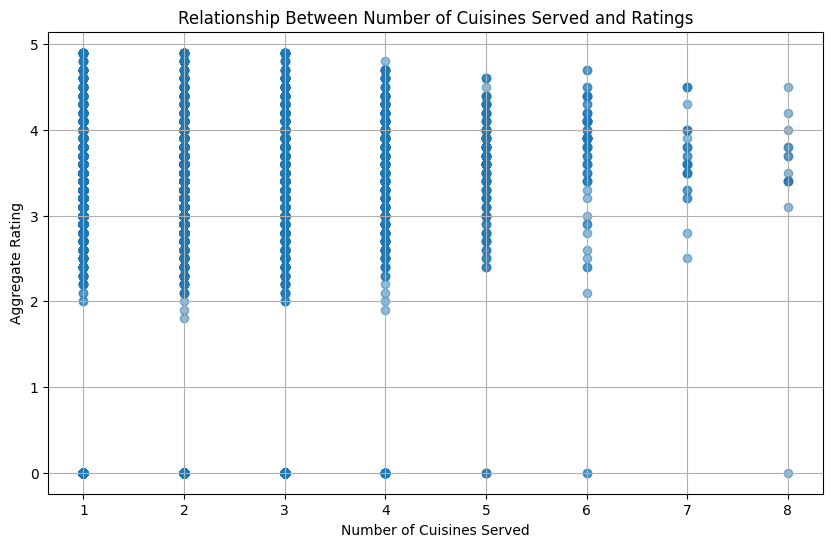

In [23]:
# Split the 'Cuisines' column into individual cuisines and count the number of cuisines for each restaurant
new_restaurant['Number of Cuisines'] = new_restaurant['Cuisines'].str.split(', ').apply(len)

# Find the maximum and minimum number of cuisines served
max_cuisines_served = new_restaurant['Number of Cuisines'].max()
min_cuisines_served = new_restaurant['Number of Cuisines'].min()

# Display the results
print(f"The maximum number of cuisines served by a restaurant is {max_cuisines_served}.")
print(f"The minimum number of cuisines served by a restaurant is {min_cuisines_served}.")

# Explore the relationship between the number of cuisines served and ratings
plt.figure(figsize=(10, 6))
plt.scatter(new_restaurant['Number of Cuisines'], new_restaurant['Aggregate rating'], alpha=0.5)
plt.title('Relationship Between Number of Cuisines Served and Ratings')
plt.xlabel('Number of Cuisines Served')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

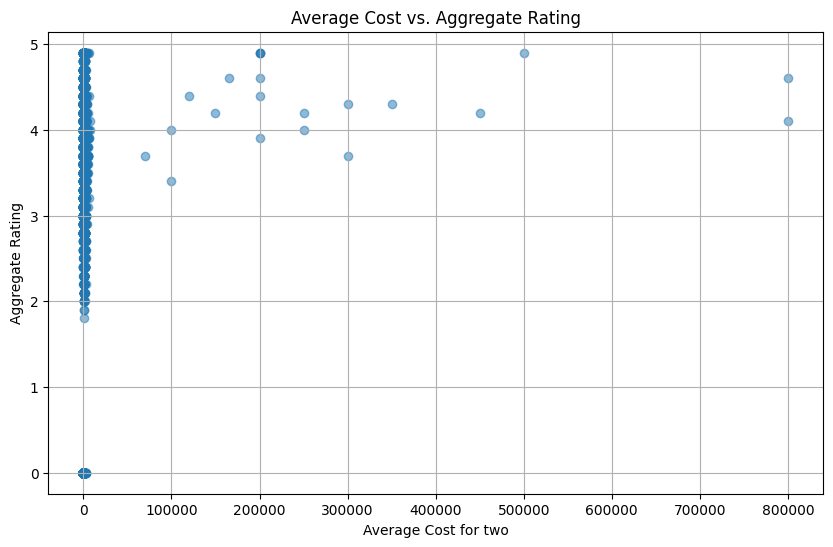

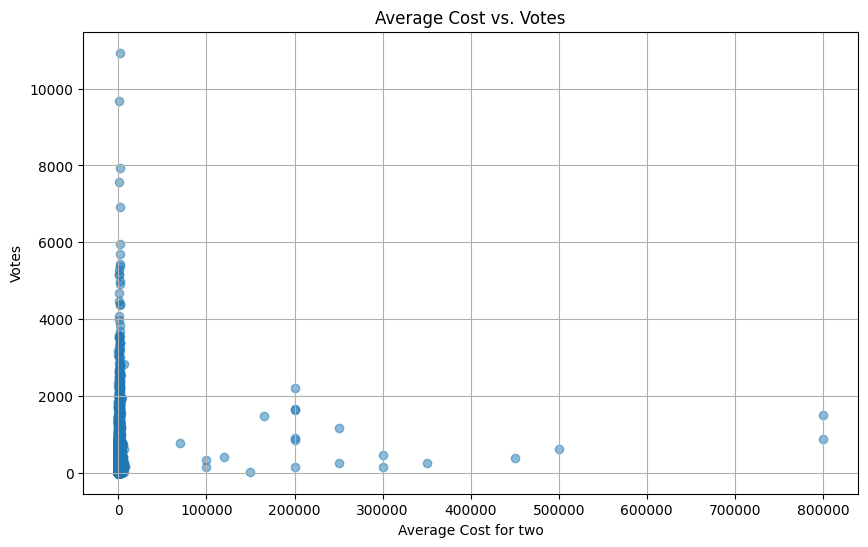

In [24]:
import matplotlib.pyplot as plt

# Scatter plot for 'Average Cost vs. Aggregate Rating'
plt.figure(figsize=(10, 6))
plt.scatter(new_restaurant['Average Cost for two'], new_restaurant['Aggregate rating'], alpha=0.5)
plt.title('Average Cost vs. Aggregate Rating')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

# Scatter plot for 'Average Cost vs. Votes'
plt.figure(figsize=(10, 6))
plt.scatter(new_restaurant['Average Cost for two'], new_restaurant['Votes'], alpha=0.5)
plt.title('Average Cost vs. Votes')
plt.xlabel('Average Cost for two')
plt.ylabel('Votes')
plt.grid(True)
plt.show()